# **Predicting User Churn for an E-commerce Platform**

In [1]:
#importing libraries
# Data Handling and Manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
path= "/content/drive/MyDrive/ML Assignment/events.csv"
data = pd.read_csv(path)
### NOTE- Change path of the CSV According to your Device


In [3]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
data.shape

(885129, 9)

## **Data Inspection & Preprocessing**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [6]:
data.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.747287e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [7]:
data.dtypes

,0
event_time,object
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,int64
user_session,object


In [8]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,236219
brand,212364
price,0
user_id,0
user_session,165


#### Initial Observations:
1. The dataset is huge (885129, 9)
2. The event_time column is not in the correct format, which requires transformation.
3. The dataset contains missing values that need to be handled to ensure data quality.

## **Data Cleaning**

In [9]:
# Check how many duplicate rows exist:
data.duplicated().sum()

655

In [10]:
# Removeing duplicates
data = data.drop_duplicates()

In [11]:
data.shape

(884474, 9)

In [12]:
# converting event_time column to datatime
data['event_time'] = pd.to_datetime(data['event_time'])

In [13]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,236047
brand,212232
price,0
user_id,0
user_session,162


Handelling Missing Values

In [14]:
# Filling the missing values for categorical columns with "unknown" since this many rows can't be dropped as it fill effecr in modeling if dropped
data['category_code'] = data['category_code'].fillna("unknown")
data['brand'] = data['brand'].fillna("unknown")
data.dropna(subset=['user_session'],inplace=True)       # droping all the row with missing user_session since it will not effect the data much


In [15]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


## **Exploratory Data Analysis (EDA)**

<ipython-input-16-19e05a98bbc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


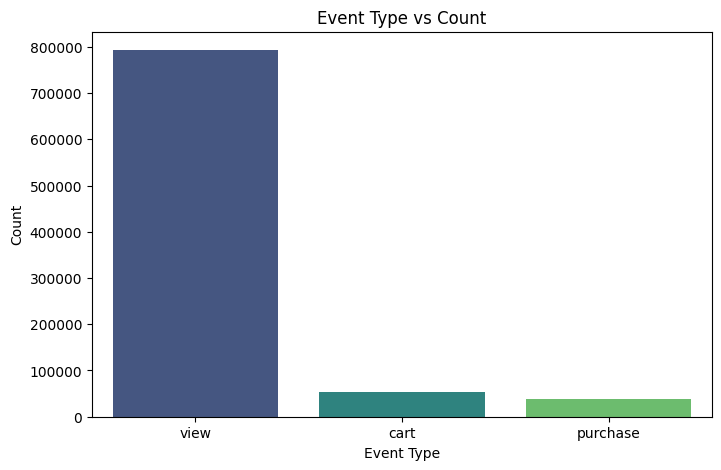

In [16]:
# Count the number of each event type
event_counts = data['event_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Event Type vs Count')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [17]:
data['event_type'].value_counts()

,count
event_type,
view,792943
cart,54026
purchase,37343


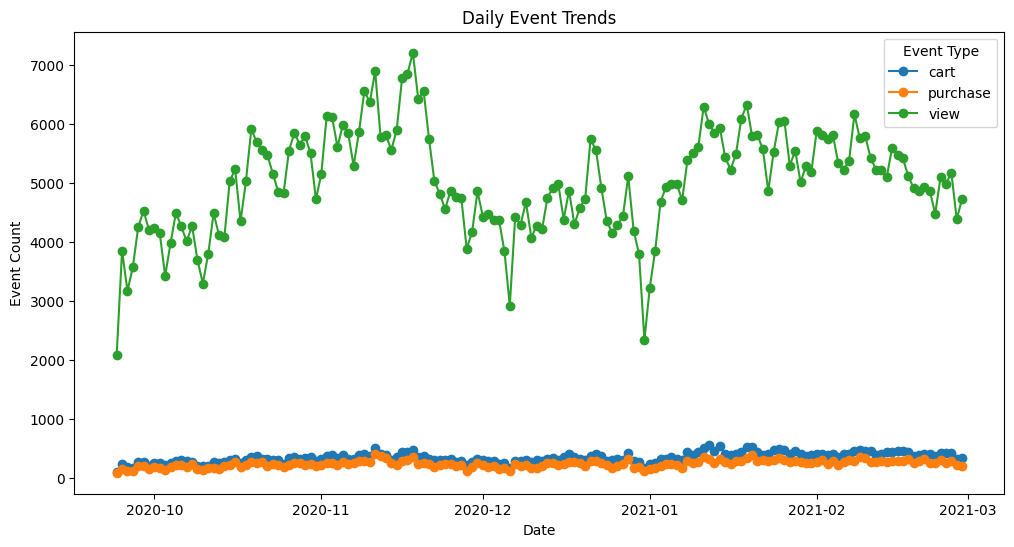

In [18]:
# Temporal Analysis

data['date'] = data['event_time'].dt.date

# Daily event counts
daily_events = data.groupby('date')['event_type'].value_counts().unstack()

# Plot daily trends
daily_events.plot(figsize=(12, 6), marker='o')
plt.title('Daily Event Trends')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.legend(title='Event Type')
plt.show()

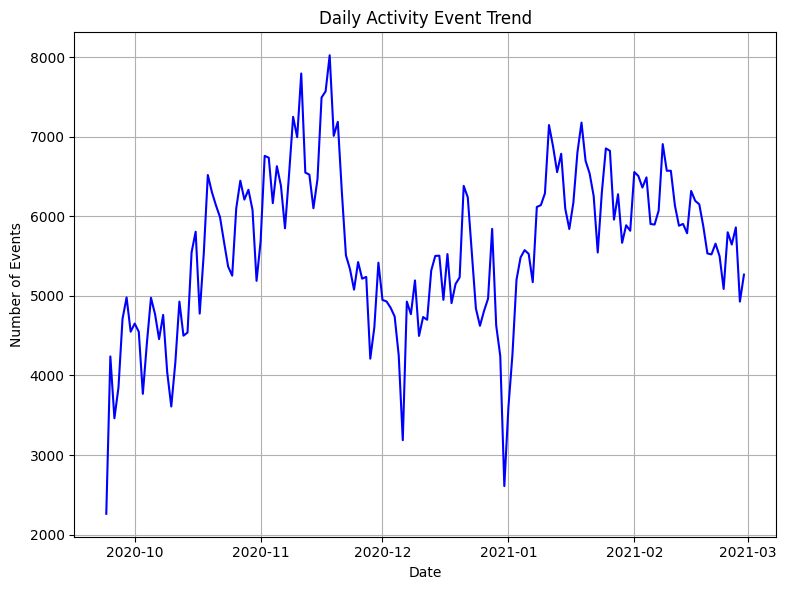

In [19]:
# Group by date
daily_activity = data.groupby(data['event_time'].dt.date).size().reset_index(name='count')

# Plot daily activity
plt.figure(figsize=(8, 6))
plt.plot(daily_activity['event_time'], daily_activity['count'], linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Daily Activity Event Trend')


# Show the plot
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

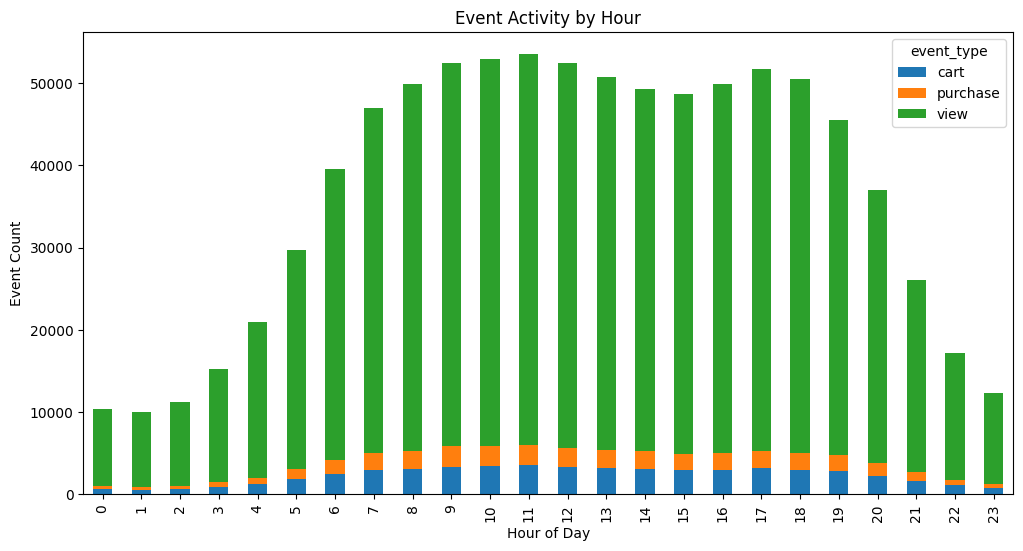

In [20]:

# Extract hour from the event time
data['hour'] = data['event_time'].dt.hour

# Count events by hour
hourly_events = data.groupby('hour')['event_type'].value_counts().unstack()

# Plot event activity by hour
hourly_events.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Event Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Event Count')
plt.show()

In [21]:
# Count top brands
top_brands = data['brand'].value_counts().head(15).reset_index()
top_brands.columns = ['brand', 'count']


# Plot top brands
fig = px.bar(top_brands,
             x='brand',
             y='count',
             title="Top 15 Brands",
             labels={'brand': 'Brand', 'count': 'Count'})
fig.show()

In [22]:
# Count top categories
top_categories = data['category_code'].value_counts().head(15).reset_index()
top_categories.columns = ['category_code', 'count']

# Plot top categories
fig = px.bar(top_categories,
             x='category_code',
             y='count',
             title="Top Categories",
             labels={'category_code': 'Category', 'count': 'Count'})
fig.show()

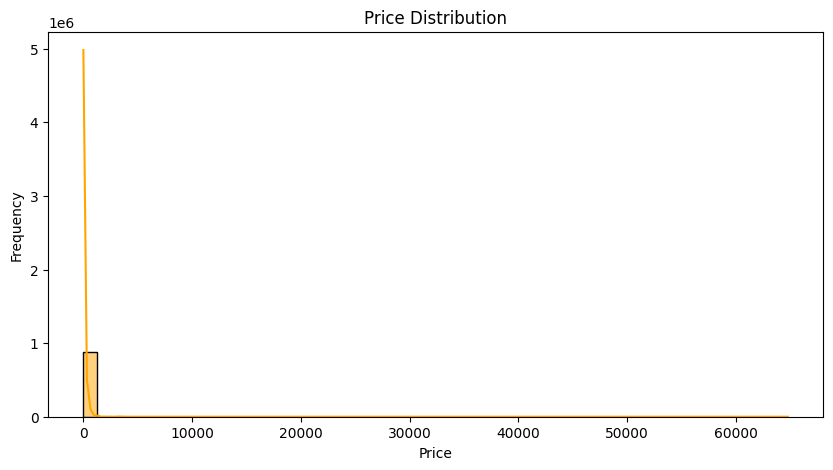

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=50, kde=True, color='orange')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **EDA Output**


**Event Type Distribution:**
Most people viewed products, with fewer adding to the cart and even fewer completing purchases.
Bars represent event types, and taller bars mean more occurrences. Almost- 80% of events are views. 15% are carts. 5% are purchases.

**Daily Activity Trend:**
Activity changes daily, with some days showing spikes or dips.
The line chart connects daily event totals, showing trends over time.

**Hourly Activity Trend:** Mostly Activity is observed from hour 10 to hour 18 Since most people use their devices in this time.

**Top 15 Brands:**
The tallest bar shows the most popular brand in the dataset.
Other brands appear less frequently, helping identify dominant brands.

**Top Categories:**
The tallest bar represents the most interacted category, showing user preferences.
Shorter bars show less popular categories, giving insights into demand.

**Hourly Activity:**
Certain hours have spikes in activity, showing peak user engagement times.
Late-night hours typically have fewer events.

**Price Distribution:**
Most products are in lower price ranges, shown by taller bars on the left.
Higher price ranges have fewer products, indicated by shorter bars on the right.

## **Defining Churn**

**Churn Definition and Context**

A user is considered churned if no purchase  or interacted (viewed or carted a product) has been made in the last

*   30 days, based on industry standards and regular shopper behavior.
*   The 30-day threshold allows timely re-engagement, preventing user loss to competitors

**Reasoning for the 30-Day Threshold**

User Behavior: Regular shoppers tend to purchase within a month; longer gaps may indicate churn.

Industry Standards: Common benchmark to balance accurate churn detection and minimizing false positives.

Business Context: Early identification enables interventions like offers or re-engagement campaigns.

**Handling Edge Cases**

High-Value Customers: Adjust the churn definition using metrics like average purchase value and purchase frequency.

New Users: Exclude sign-ups within the observation window as they may not show activity yet.

Irregular Buyers: Segment users with occasional or sales-driven patterns separately for accurate churn detection.


Seasonal Trends: Account for users' past seasonal behavior to avoid misclassifying seasonal shoppers as churned.

**NOTE:** We can use Some other Ctiteria for Churn Prediction also But here we used Which is most Generally used by the industry and does not have much complexities

## **Feature Engineering**

In [24]:
data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,11
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,11
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,11
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,11
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,11
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,2020-09-24,11
6,2020-09-24 11:58:23+00:00,view,3791349,2144415935086199225,computers.desktop,unknown,215.41,1515915625519388877,J1t6sIYXiV,2020-09-24,11
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,2020-09-24,11
8,2020-09-24 11:58:25+00:00,view,657859,2144415939431498289,unknown,unknown,34.17,1515915625519320570,HEl15U7JVy,2020-09-24,11
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39,2020-09-24,11


Recency: Days since the user's last event (view, cart, or purchase).

Frequency: Total number of events (views, carts, purchases) by a user.

Spending: Total spending by a user.

In [25]:
# Recency
data['days_since_last'] = (data['event_time'].max() - data['event_time']).dt.days
# Merge Recency into the dataset
user_recency = data.groupby('user_id')['days_since_last'].min().reset_index(name='recency')

In [26]:
# Frequency
user_frequency = data.groupby('user_id')['event_type'].count().reset_index(name='frequency')


In [27]:
# Spending
user_spending = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index(name='spending')


In [28]:
# Merge the features into a single dataset (frequency, monetary, and recency)
r_f_m = user_frequency.merge(user_spending, on='user_id', how='left').merge(user_recency, on='user_id', how='left').fillna(0)

In [29]:
r_f_m.head(5)

,user_id,frequency,spending,recency
0,1515915625353226922,1,0.0,122
1,1515915625353230067,1,0.0,145
2,1515915625353230683,13,0.0,78
3,1515915625353230922,1,0.0,149
4,1515915625353234047,36,0.0,10


In [30]:
r_f_m.shape

(407237, 4)

### **Session-Based Features**
**Total Number of Sessions**:
Counts how many times a user started a session on the platform.

**Average Session Duration**:
Measures the average time a user spends in a session, from start to end.

In [31]:
# Group by user and session
session_data = data.groupby(['user_id', 'user_session']).agg(
    session_duration=('event_time', lambda x: (x.max() - x.min()).seconds),  # Total session duration in seconds
    event_count=('event_type', 'count')  # Total events in session
).reset_index()

# Calculate user-level session features
session_features = session_data.groupby('user_id').agg(
    session_count=('user_session', 'count'),  # Total number of sessions
    average_session_duration=('session_duration', 'mean')  # Average session duration
).reset_index()



In [32]:
session_features.head()

,user_id,session_count,average_session_duration
0,1515915625353226922,1,0.0
1,1515915625353230067,1,0.0
2,1515915625353230683,4,624.5
3,1515915625353230922,1,0.0
4,1515915625353234047,1,61790.0


In [33]:
session_features.shape

(407237, 3)

###**Behavioral Features**
**View to Cart Ratio**

Definition: Tracks how often product views lead to cart additions.

Formula:
views
/
(
carts
+
1
)
views/(carts+1) (avoids division by zero).

Purpose: Evaluates conversion of views to cart additions.

**Cart to Purchase Ratio**

Definition: Measures how often cart additions result in purchases.

Formula:
carts
/
(
purchases
+
1
)
carts/(purchases+1) (avoids division by zero).

Purpose: Assesses likelihood of purchases from carts.

In [34]:
# Calculate views, carts, and purchases for each user
behavioral_features = data.groupby('user_id').agg(
    views_count=('event_type', lambda x: (x == 'view').sum()),
    carts_count=('event_type', lambda x: (x == 'cart').sum()),
    purchases_count=('event_type', lambda x: (x == 'purchase').sum())
).reset_index()

# Calculate ratios
behavioral_features['view/cart_ratio'] = behavioral_features['views_count'] / (behavioral_features['carts_count'] + 1)
behavioral_features['cart/purchase_ratio'] = behavioral_features['carts_count'] / (behavioral_features['purchases_count'] + 1)


In [35]:
behavioral_features.head()

,user_id,views_count,carts_count,purchases_count,view/cart_ratio,cart/purchase_ratio
0,1515915625353226922,1,0,0,1.0,0.0
1,1515915625353230067,1,0,0,1.0,0.0
2,1515915625353230683,13,0,0,13.0,0.0
3,1515915625353230922,1,0,0,1.0,0.0
4,1515915625353234047,36,0,0,36.0,0.0


In [36]:
behavioral_features.shape

(407237, 6)

Some New features can also me made for modelling but these many are enough as other new features will also be derived from these only and will increase the compleasexity in the model unnecessarly.

Other features that can be used are-

**Activity days:** Number of unique days a user was active

**Average views before purchase**

**Average price viewed and purchased**

**Weekday or Weekend shopper**


But these features will increase complesities hence not included.

###**Merge all features into a single dataset**

In [37]:
# Merge all features into a single dataset
features_model = r_f_m.merge(session_features, on='user_id', how='left').merge(behavioral_features, on='user_id', how='left')

In [38]:
features_model.head()

,user_id,frequency,spending,recency,session_count,average_session_duration,views_count,carts_count,purchases_count,view/cart_ratio,cart/purchase_ratio
0,1515915625353226922,1,0.0,122,1,0.0,1,0,0,1.0,0.0
1,1515915625353230067,1,0.0,145,1,0.0,1,0,0,1.0,0.0
2,1515915625353230683,13,0.0,78,4,624.5,13,0,0,13.0,0.0
3,1515915625353230922,1,0.0,149,1,0.0,1,0,0,1.0,0.0
4,1515915625353234047,36,0.0,10,1,61790.0,36,0,0,36.0,0.0


In [39]:
features_model.shape

(407237, 11)

In [40]:
Churned_threshold=30
# Define churn: 1 if recency > 30 days, else 0
features_model['churned']= (features_model['recency'] > Churned_threshold).astype(int)

In [41]:
features_model.head()

,user_id,frequency,spending,recency,session_count,average_session_duration,views_count,carts_count,purchases_count,view/cart_ratio,cart/purchase_ratio,churned
0,1515915625353226922,1,0.0,122,1,0.0,1,0,0,1.0,0.0,1
1,1515915625353230067,1,0.0,145,1,0.0,1,0,0,1.0,0.0,1
2,1515915625353230683,13,0.0,78,4,624.5,13,0,0,13.0,0.0,1
3,1515915625353230922,1,0.0,149,1,0.0,1,0,0,1.0,0.0,1
4,1515915625353234047,36,0.0,10,1,61790.0,36,0,0,36.0,0.0,0


In [42]:
# Save to CSV for easy reloading
#features_model.to_csv('features_model.csv', index=True)

## **Modeling**

In [43]:
X = features_model[['recency', 'frequency', 'spending', 'session_count', 'average_session_duration',
              'view/cart_ratio', 'cart/purchase_ratio']]

In [44]:
y = features_model[['churned']]

In [45]:
# Convert all columns to float
X = X.astype(np.float32)

In [46]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
X_train.shape

(325789, 7)

In [48]:
X_test.shape

(81448, 7)

####**Logistic Regression Model**

In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [50]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score


# Prediction on the test data
y_pred = lr_model.predict(X_test)  # Predicted labels
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# # Evaluate model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)

In [51]:
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1-Score:", f1)
print("Logistic Regression ROC-AUC:", roc_auc)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Precision: 0.9774014731566558
Logistic Regression Recall: 0.9894835565258837
Logistic Regression F1-Score: 0.983405406231377
Logistic Regression ROC-AUC: 0.9948488394903767
Logistic Regression Accuracy: 0.9733326785188096


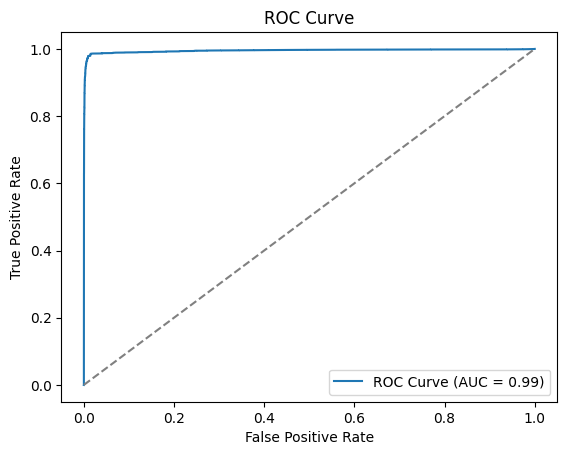

In [52]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [53]:
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     16407
           1       0.98      0.99      0.98     65041

    accuracy                           0.97     81448
   macro avg       0.97      0.95      0.96     81448
weighted avg       0.97      0.97      0.97     81448



In [54]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm_log_reg}")

Confusion Matrix for Logistic Regression:
[[14919  1488]
 [  684 64357]]


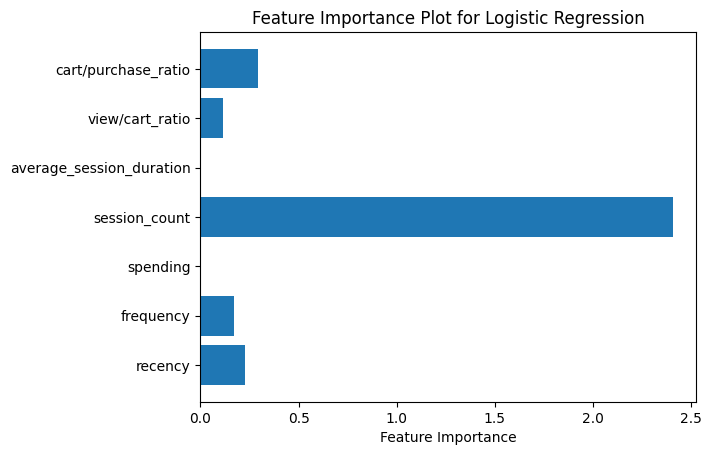

In [55]:
# Get coefficients (the importance of each feature)
coefficients = lr_model.coef_[0]

# Plot feature importance
plt.barh(range(len(coefficients)), np.abs(coefficients))
plt.yticks(range(len(coefficients)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot for Logistic Regression')
plt.show()

### **Random Forest Model**

In [56]:
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [57]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
AUC: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16407
           1       1.00      1.00      1.00     65041

    accuracy                           1.00     81448
   macro avg       1.00      1.00      1.00     81448
weighted avg       1.00      1.00      1.00     81448

Confusion Matrix:
[[16407     0]
 [    0 65041]]


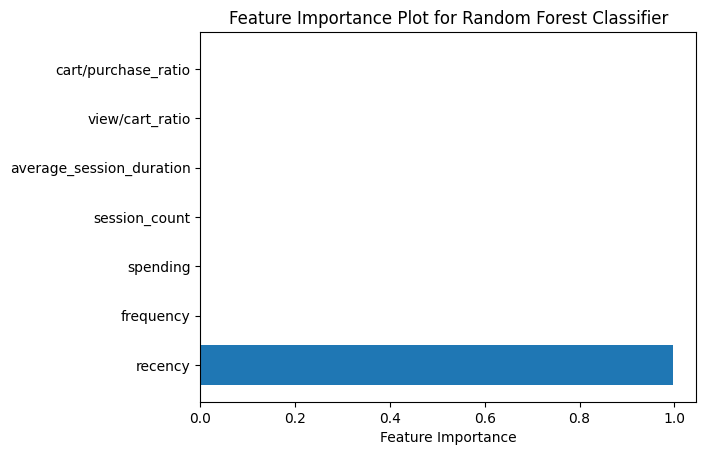

In [58]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Plot feature importance
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot for Random Forest Classifier')
plt.show()

### **XGBoost Model**

In [59]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [60]:
# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print(f"AUC: {auc_xgb}")
print(f"Classification Report:\n{classification_rep_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

Accuracy: 1.0
AUC: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16407
           1       1.00      1.00      1.00     65041

    accuracy                           1.00     81448
   macro avg       1.00      1.00      1.00     81448
weighted avg       1.00      1.00      1.00     81448

Confusion Matrix:
[[16407     0]
 [    0 65041]]


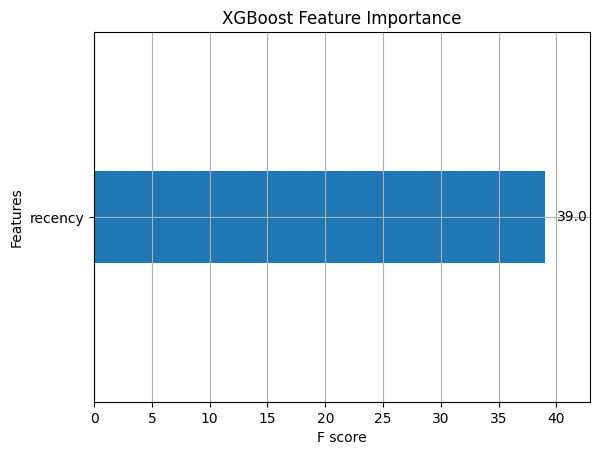

In [61]:
# Plot feature importance using XGBoost
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()


## **Deep Learning ANN Model**

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [63]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [64]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [65]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9442 - loss: 7.2758 - val_accuracy: 0.9809 - val_loss: 0.1765
Epoch 2/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9816 - loss: 0.3885 - val_accuracy: 0.9809 - val_loss: 0.0394
Epoch 3/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9878 - val_loss: 0.0237
Epoch 4/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9890 - loss: 0.0301 - val_accuracy: 0.9883 - val_loss: 0.0220
Epoch 5/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9892 - loss: 0.0334 - val_accuracy: 0.9918 - val_loss: 0.0207
Epoch 6/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9958 - val_loss: 0.0159
Epoch 7/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9784 - val_loss: 0.0651
Epoch 8/20
10181/10181 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 

In [66]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test).ravel()  # Probability predictions
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions


Test Accuracy: 0.9924
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [67]:
# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

AUC-ROC Score: 0.9997
Confusion Matrix:
[[16371    36]
 [  581 64460]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16407
           1       1.00      0.99      1.00     65041

    accuracy                           0.99     81448
   macro avg       0.98      0.99      0.99     81448
weighted avg       0.99      0.99      0.99     81448



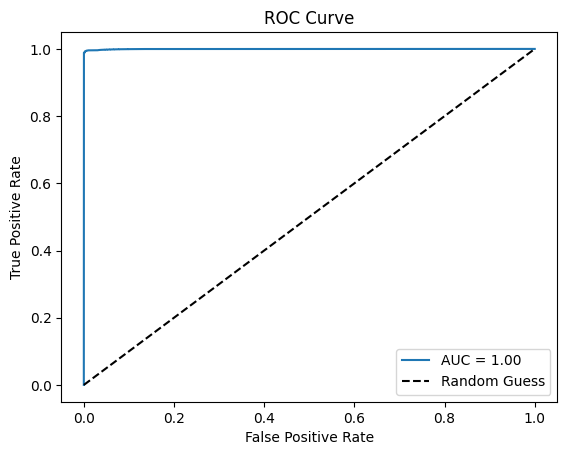

In [68]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## **Interpretation of Models:**
**1. Logistic Regression**

Good Things:The model has high precision (0.9774), recall (0.9895), and F1-score (0.9834), which indicate good performance in identifying both classes.
The ROC-AUC score (0.9948) suggests excellent separability between classes.
The model is simple, interpretable, and efficient.

Bad Things:The confusion matrix shows 1,488 false positives (Class 0 misclassified as Class 1) and 684 false negatives (Class 1 misclassified as Class 0), which are non-trivial errors.
Performance might degrade if the data is not well-linearly separable or suffers from multicollinearity.

**2. Random Forest**

Good Things:
Achieved perfect scores (accuracy, AUC, precision, recall, and F1-score) across all metrics, with no misclassification in the confusion matrix.
Robust to outliers and can handle non-linear relationships well.

Bad Things:
The feature importance shows that only "recency" is important, potentially indicating overfitting or ignoring other important features.
Might be computationally expensive for large datasets.

**3. XGBoost**

Good Things:
Like Random Forest, XGBoost achieved perfect scores across all metrics and handled the classification task flawlessly.
Efficient with handling imbalanced data and complex patterns.
Feature selection and importance metrics are inherently available.

Bad Things:
Feature importance also indicates "recency" dominates, raising concerns of overfitting or biased training.
Hyperparameter tuning for XGBoost can be complex and time-consuming.

**4. Deep Learning (ANN)**

Good Things:
High test accuracy (0.9924) and an impressive AUC-ROC score (0.9997), indicating excellent model performance.
Handles complex and non-linear data relationships effectively.

Bad Things:
The confusion matrix shows 36 false positives and 581 false negatives, which is a notable number of misclassifications compared to Random Forest and XGBoost.
Requires significant computational resources and may require more data for generalization.

### **Best Model Selection:**

Best Model: Logistic Regression or ANN Deep Learning Model
Despite Random Forest and XGBoost achieving perfect metrics, their reliance on a single feature (Recency) suggests overfitting or improper feature handling.
Logistic Regression achieves high metrics while being interpretable, generalizable, and leveraging all features.
ANN Model also shows Similar results both are almost equally good.

Logistic Regression is the most reliable model for this task, balancing performance, interpretability, and generalizability. Improvements like feature engineering and regularization can further enhance its performance, ensuring robustness and avoiding over-reliance on specific features.

If the ANN (Deep Learning Model) is selected as the best model due to its high performance (accuracy: 99.24%, AUC-ROC: 0.9997), steps for further improvements-

Model Architecture: Layer Optimization, Activation Functions, Batch Normalization can improve performance

Hyperparameter Tuning: Learning Rate, Regularization, Batch Size and Epochs can help in improving performance


**NOTE:** I personally would prefer ANN Deep Learning Model as ANN Models are universal function approximators and these models generally give Good Results on Large datasets. (according to my experience in Data Science)
But Logistic Regression gives better results on new data so Logistic Regression can also be Used.

In [ ]:
NOTE:

## **Recommendations & Conclusions :**

### **Conclusion**

**Churn Analysis:**

Using feature importance analysis from Logistic Regression and Random Forest models, key churn drivers were identified, such as:
Lower purchase counts.
Reduced total spending.
High event activity without subsequent purchases.

**User Behavior Insights:**

Behavioral patterns, such as inactivity after initial engagement, significantly contribute to churn.
Time-based patterns revealed that users showing inactivity for 30 days are at higher churn risk.

**Targeted Strategies:**

SHAP values and partial dependence plots provided clarity on feature contributions, enabling the design of actionable strategies to mitigate churn.

**Critical Recommendations:**

To reduce churn, targeted marketing campaigns should focus on users with early disengagement signs.
Incentive-based strategies, like loyalty programs and discounts, align with user preferences and improve retention rates.


##**Recommendations**

**Re-engage Inactive Users:**

Design personalized re-engagement campaigns using discounts, reminders, and exclusive offers.
Use urgency tactics like time-limited promotions or flash sales to encourage immediate action.

**Improve Conversion Rates:**

Target users with high view-to-cart ratios by:
Sending cart abandonment reminders.
Offering incentives such as free shipping or discounts for completing purchases.

**Optimize Product Categories:**

Analyze high-churn categories for underlying issues, such as product quality, pricing, or availability.
Address potential mismatches between user expectations and category performance.

**Other:**
Loyalty Programs: Reward repeat users with points, perks, or exclusive access.

Seasonal Campaigns: Leverage weekends and holidays for promotions.

Behavioral Segmentation: VIP perks for high-value users; re-engagement campaigns for inactive ones.

Onboarding & Education: Tutorials and enhanced onboarding to maximize user value.

###**Business Implications**
**Churn Drivers:**

Identified key products or categories associated with higher churn rates.
Recognized customer behavior patterns indicating increased churn risk.
Detected time-based patterns in user activity, such as inactivity thresholds.

**Actionable Interventions:**

Targeted campaigns based on high-risk user segments.
Specific improvements in product categories to address user dissatisfaction.

**Engagement Strategies:**

Deploy personalized offers and loyalty programs to incentivize user retention.
Seasonal campaigns to leverage periods of high user activity.


### **Research Paper Usage**
Research paper titled "In Pursuit of Enhanced Customer Retention Management" Helped me as-

**Framework for Churn Prediction:** The paper provides a structured approach to understanding customer churn, emphasizing predictive modeling techniques and actionable insights. This is directly applicable to your goal of identifying users likely to churn.

**Feature Engineering Insights:** It highlights factors influencing churn, such as frequency of interactions, recency of purchases, and engagement levels. These insights can guide the selection and engineering of features.

**Actionable Recommendations:** The paper bridges the gap between academic research and practical needs, offering strategies for businesses to act on churn predictions. This is invaluable for providing actionable takeaways.

**Feature Selection:** Use the key variables mentioned in the paper (e.g., user activity patterns, purchasing frequency, and product preferences) to engineer predictive features.

**Segmentation and Personalization:** Leverage methods discussed for customer segmentation to tailor your models and identify at-risk groups

In [69]:
print("Completed!!")
print("Thank-You!!!!")

Completed!!
Thank-You!!!!


In [70]:
print("By- Anmol Gupta")

By- Anmol Gupta
